# Linear Regression - Stats Model 
## (House Price Prediction)
### Linear Regression - finding Causality between two Variables, Dependent (Y) and Independent (X) variables
### Causality - How the relationship between variables impacts the outcome

In [12]:
!pip install statsmodels

 ### ====> Install pip model from internet "https://pip.pypa.io/en/stable/installing/#"
#### click get-pip.py....once saved in local folder, click the link to run.......so all necessary packages are installed

# Problem Statement : Predicting House price using Statsmodel
### Data is taken from FRED (US Govt Site), Data repository
### Link : https://fred.stlouisfed.org/

# Data Location

In [17]:
#fed_funds.csv
# economics.csv
# gdp.csv
# ginzberg.csv
# monthly-hpi.csv
# seasons.csv
# shillers.csv
# unemployment-macro.csv
# USA_Housing.csv

## Important Libraries

In [27]:
from IPython.display import HTML, display

import statsmodels.api as sm # importing of statsmodel
from statsmodels.formula.api import ols 
# OLS - Ordinary Lease Squared - is a type of linear least squares method for estimating the unknown parameters in a linear regression model.
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt # for visual representation 
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

sns.set_style('darkgrid')

In [35]:
house_price_index = pd.read_csv('monthly-hpi.csv')
unemp = pd.read_csv('unemployment-macro.csv')
federal_funds_rate = pd.read_csv('fed_funds.csv')
shiller = pd.read_csv('shiller.csv')
gross_domestic_product = pd.read_csv('gdp.csv')

In [36]:
house_price_index.head() # head function give top 5 line item 

,date,housing_price_index
0,2010-11-01,186.07
1,2010-12-01,183.27
2,2011-01-01,181.35
3,2011-02-01,179.66
4,2011-03-01,178.84


In [39]:
unemp.head() # understanding of colum and its relevance in project is extremely important...also need to understand
# if its mentioned in %, actual numbers, or in Currency etc

,date,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers
0,2010-11-01,16.9,8696,2531,6708,5.7,63.0
1,2010-12-01,16.6,8549,2609,6899,6.4,61.2
2,2011-01-01,16.2,8393,2800,6816,6.5,60.1
3,2011-02-01,16.0,8175,2730,6741,6.4,60.2
4,2011-03-01,15.9,8166,2434,6735,6.4,60.3


In [41]:
gross_domestic_product.head() # every data need to understand measuring units 

,date,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,5766.7,64.2,192.7,14881.3
1,2011-04-01,5870.8,64.2,203.1,14989.6
2,2011-07-01,5802.6,64.0,204.6,15021.1
3,2011-10-01,5812.9,64.1,201.1,15190.3
4,2012-01-01,5765.7,63.7,200.7,15291.0


In [42]:
shiller.head()

,date,sp500,consumer_price_index,long_interest_rate
0,2010-11-01,1198.89,218.80,2.76
1,2010-12-01,1241.53,219.18,3.29
2,2011-01-01,1282.62,220.22,3.39
3,2011-02-01,1321.12,221.31,3.58
4,2011-03-01,1304.49,223.47,3.41


### Date is the common factor on all the worksheet, however the date variance is different for different timeperiod...now we need to merge all different worksheet to one worksheet

### as we have multiple independent variables impacting HPI (Housing Price Index) Output, hence its a multiple regression problem 

# Merging of Data on Date

In [58]:
df = (shiller.merge(house_price_index,on='date').merge(unemp,on='date').merge(federal_funds_rate,on='date').merge(gross_domestic_product))
# merge function is used for merging data on 'date' parameter at house_price_index file as its common across all other data files

In [61]:
df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


In [62]:
df.tail() # tail represent last 5 rows

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
18,2015-07-01,2094.14,238.65,2.32,227.98,10.3,3359,1927,7239,10.4,49.6,0.13,6157.8,62.6,193.9,16454.9
19,2015-10-01,2024.81,237.84,2.07,227.71,9.8,3344,1916,7377,9.7,49.7,0.12,6146.6,62.5,187.5,16490.7
20,2016-01-01,1918.60,236.92,2.09,227.45,9.9,3234,2089,7470,9.9,47.6,0.34,6219.7,62.7,182.6,16525.0
21,2016-04-01,2075.54,239.26,1.81,235.18,9.7,3340,1715,7416,10.9,48.8,0.37,6219.3,62.8,183.2,16583.1
22,2016-07-01,2148.90,240.65,1.50,241.59,9.7,3175,1950,7442,10.9,48.4,0.39,6307.5,62.8,187.7,16727.0


In [64]:
df.info() # info function helps in determining how many rows, colum, type of data, colum name, if we have any null data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 16 columns):
date                              23 non-null object
sp500                             23 non-null float64
consumer_price_index              23 non-null float64
long_interest_rate                23 non-null float64
housing_price_index               23 non-null float64
total_unemployed                  23 non-null float64
more_than_15_weeks                23 non-null int64
not_in_labor_searched_for_work    23 non-null int64
multi_jobs                        23 non-null int64
leavers                           23 non-null float64
losers                            23 non-null float64
federal_funds_rate                23 non-null float64
total_expenditures                23 non-null float64
labor_force_pr                    23 non-null float64
producer_price_index              23 non-null float64
gross_domestic_product            23 non-null float64
dtypes: float64(12), int64(3), object(1)

In [68]:
df.columns # Columns describe colum names

Index(['date', 'sp500', 'consumer_price_index', 'long_interest_rate',
       'housing_price_index', 'total_unemployed', 'more_than_15_weeks',
       'not_in_labor_searched_for_work', 'multi_jobs', 'leavers', 'losers',
       'federal_funds_rate', 'total_expenditures', 'labor_force_pr',
       'producer_price_index', 'gross_domestic_product'],
      dtype='object')

# OLS (Ordinary Least Squares) or Linear Regression has some assumption
### OLS - This method corresponds to to minimizing the sum of squared differences between actual and observed values 

## OLS and R Squared are not same, R Square is matrix - Error or Cost line
## OLS is just trend line

## Assumptions

1. Linearity - Assumption that there is a linear relationship between target and features

2. No Multicollinearity - Predictor and Target are not collinear i.e thye are not highly collerated

3. Zero Condition mean - Average distance between observations and trend line or best fit line is zero

4. Homoskedascity - No pattern in residuals or errors or error is constant

5. No Autocorrelation - A Variable is not correleated to itself when shifted in time/space

## All above assumptions must be satisfied before we use linear regression (simple or multiple) otherwise the predictions/conclusions will not be correct


In [70]:
housing_model = ols('housing_price_index ~ total_unemployed',data=df).fit() 
# we have taken single variable house_price_index........tilde (~) means approximately equal with another variable
# total unemployed

# Single linear regression

In [72]:
housing_model.summary() # it provide html table OLS is a representation if given independent variable is linear to 
# dependent variable or its good fit model or not

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.952
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                     413.2
Date:                 Tue, 16 Mar 2021   Prob (F-statistic):           2.71e-15
Time:                         15:32:53   Log-Likelihood:                -65.450
No. Observations:                   23   AIC:                             134.9
Df Residuals:                       21   BIC:                             137.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          313.3128      5.408     57.938      0.000     302.067     324.559
total_unemployed    -8.3324      0.410    -20.327      0.000      -9.185      -7.480
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.552
Skew:                           0.294   Prob(JB):                        0.759
Kurtosis:                       2.521   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R Squared - Cost or Lost function or can be called as Error (Difference between actual data and best fit line)
1. Higher R Squared value, then model is good. Here 95.2% is the performance or total employment impacts my target variable
2. **Adjusted R Squared** - is always less then R Square and it naggates all the features which have less or no impact on target variables - here being single variable adjusted R Squared is 94.9% which is high and good performance, it means very less cost function or error
3. **F Statistics (ANOVA Test)** - Assessing SIGNIFICANCE of the overall regression model. Lower value is better
4. **Regression Coefficient (Coef)** - Representing the change in dependent variable with respect to 1 unit change in independent variable
5. **T Test** - Hypothesis is it looks at the relationship between target variables and every feature variables independently not in totality of all features. Each feature at a time. 
    **Null Hypotheis** is Given feature is equal to zero (no significant relationship)
    **Alternate hypothesis** is given feature is not equal to zero (significant relationship)
    if P value <0.05 then we accept alternate hypothsis
    if p Value >0.05 then we accept null hypothesis
6. **Standard Error (std)** : "standard error of the mean" refers to the standard deviation of the distribution of sample means taken from a population.
7. **Confidence Interval** - Represent 95% confident that our total_unemployment coefficient will fall between the given range
8. **P-Value** : Also represent SIGNIFICANCE of model

In [86]:
fig = plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

In [87]:
fig = sm.graphics.plot_regress_exog(housing_model,'total_unemployed',fig=fig) # Regression Plot

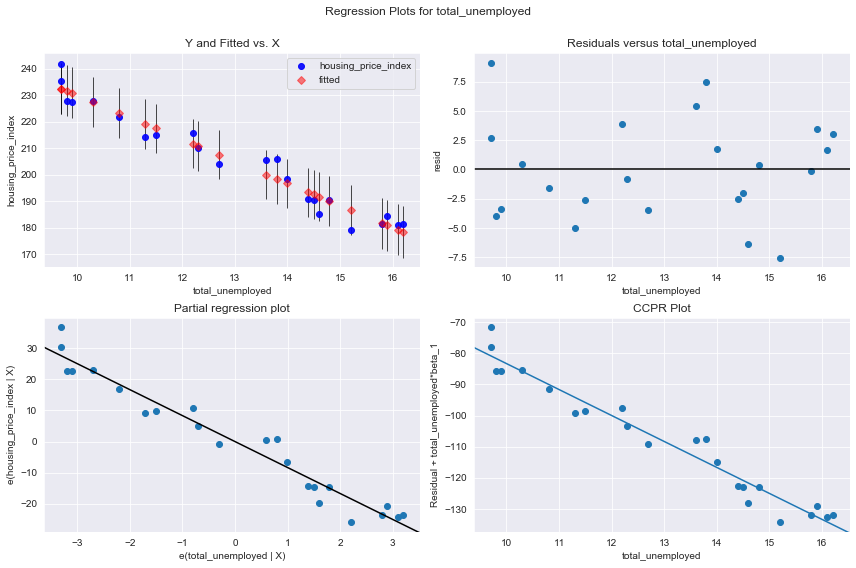

In [88]:
fig

1. **Y & fitted Vs X** : plots dependent variable against predicted value in a confidence intervals. HPI is negatively correleated with Unemployment
2. **Residual Vs total_unemployed** : If you dont find any residual or error pattern or cost function pattern then the assumption of homoskedasticall holds
3. **Partial Regression plot** : it reflects the relationship between x and y and mainly shows the impact of other variables, as we are using single varaibale here.....its not reflecting
4. **CCPR Plot** : Its a extension of Partial Regression plot, it shows where our trend line will lie after other independent variables are added

## Linear regression with multiple features/variables....other features are
1. Consumer price index
2. Long interest rate
3. Total unemployed
4. federal fund rate
5. Gross domestic product
6. Total Expenditure
7. Producer price index

In [79]:
df.columns

Index(['date', 'sp500', 'consumer_price_index', 'long_interest_rate',
       'housing_price_index', 'total_unemployed', 'more_than_15_weeks',
       'not_in_labor_searched_for_work', 'multi_jobs', 'leavers', 'losers',
       'federal_funds_rate', 'total_expenditures', 'labor_force_pr',
       'producer_price_index', 'gross_domestic_product'],
      dtype='object')

In [80]:
housing_model_1 = ols('housing_price_index ~ total_unemployed+consumer_price_index+long_interest_rate+total_unemployed+federal_funds_rate+total_expenditures+producer_price_index+gross_domestic_product',data=df).fit()

In [82]:
housing_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.977
Method:                  Least Squares   F-statistic:                     133.7
Date:                 Tue, 16 Mar 2021   Prob (F-statistic):           2.29e-12
Time:                         23:03:36   Log-Likelihood:                -52.564
No. Observations:                   23   AIC:                             121.1
Df Residuals:                       15   BIC:                             130.2
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -570.9009    208.160     -2.743      0.015   -1014.583    -127.219
total_unemployed           2.9807      2.808      1.061      0.305      -3.005       8.967
consumer_price_index       2.5335      0.963      2.632      0.019       0.482       4.585
long_interest_rate         6.3198      1.649      3.833      0.002       2.805       9.834
federal_funds_rate        12.2189     14.778      0.827      0.421     -19.280      43.718
total_expenditures        -0.0006      0.011     -0.062      0.952      -0.023       0.022
producer_price_index      -0.7521      0.388     -1.938      0.072      -1.579       0.075
gross_domestic_product     0.0180      0.010      1.721      0.106      -0.004       0.040
==============================================================================
Omnibus:                        0.545   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.634
Skew:                          -0.190   Prob(JB):                        0.728
Kurtosis:                       2.280   Cond. No.                     5.72e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Summary

1. **Aduster R Squared** is @ 97.7% performance is highly effective, 97% of the datas are explained....high performing model
2. **FStatistic** @ 133.7 which is low, reflects performance of the model is effective
3. **Features which impacts Y (output)** pvalue<0.05 means that features is significant in impacting dependable or output Y
    1. Total employment with pvalue 0.305 which is GREATER then 0.05 hence this feature is NOT significant
    2. Consumer price index with pvalue 0.019 which is LESS then 0.05 hence this feature is Significant
    3. Long interest rate with pvalue 0.002 which is LESS then 0.05 hence this feature is significant
    4. Federal fund rate with pvalue 0.42 which is GREATER than 0.05 hence this feature is NOT significant
    5. Total Expenditure with pvalue 0.952 which is GREATER than 0.05 hence this feature is NOT Significant
    6. Producer price index with pvalue 0.072 which is GREATER than 0.05 hence this feature is NOT Signifiant (as 0.072 is very close to 0.05 hence we can consider as one of significant feature which impacts outcome (Y)
    7. Gross Domestic Product with pvalue 0.106 which is GREATER than 0.05 hence this feature is NOT significant

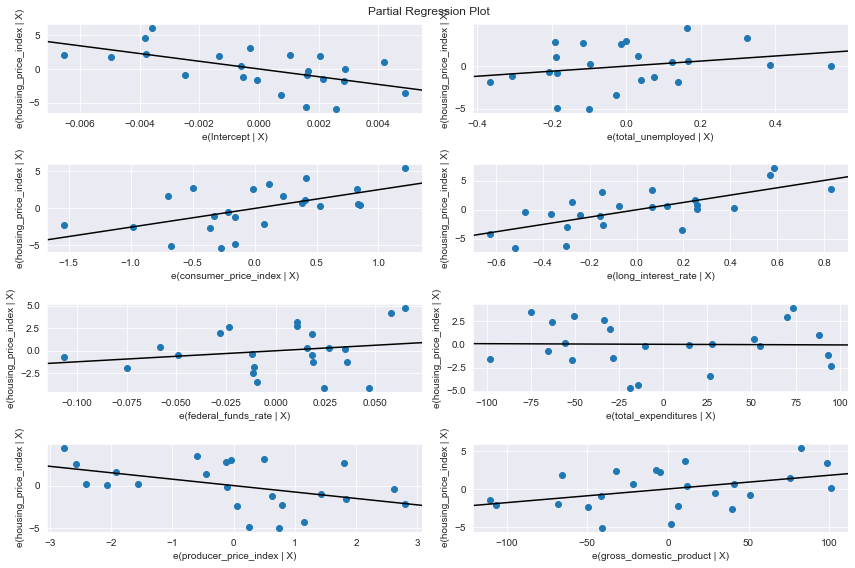

In [91]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(housing_model_1,fig=fig)

# Good Job